In [1]:
import numpy as np
import pandas as pd

In [2]:
data= pd.read_csv('peer_effects_room.csv')

In [3]:
data['person_other'] = 'placeholde' # placeholder values for 'person_other'-column
room_people = data.groupby('room').person.unique() # idx = room, values = array of people in the room

for rooms, persons_in_room in room_people.iteritems(): # Loop through rooms and persons_in_rooms
    for idx_and_id in data[data.room == rooms].index: # Loop over persons in the room (their idx's are the same as their id's)
        data.loc[idx_and_id, 'person_other'] = [x for x in persons_in_room if x != idx_and_id][0] # Only keep the roommate

#Check if correctly grouped
data.sort_values('room').head(10)

,person,room,high_school_GPA,college_GPA,person_other
1757,1757,0,-0.181905,0.566177,1603
1603,1603,0,-0.622770,0.540078,1757
1649,1649,1,0.378918,0.033256,466
466,466,1,-2.248266,-3.596904,1649
1929,1929,2,-0.095399,-0.052611,816
816,816,2,-0.798128,-1.811919,1929
1719,1719,3,1.885767,-1.104111,481
481,481,3,-1.094094,-2.096950,1719
1108,1108,4,0.977881,0.880004,1887
1887,1887,4,-2.513904,0.225987,1108


In [4]:

#Extract and rename
for_merge = data[['high_school_GPA', 'college_GPA', 'person']]\
                .rename(columns = {'high_school_GPA': 'high_school_GPA_other',
                                  'college_GPA':'college_GPA_other',
                                  'person':'person_other'})

#merge
data = pd.merge(data, for_merge, on = 'person_other', validate = '1:1')

#print to validate
data.sort_values('room').head(4)

,person,room,high_school_GPA,college_GPA,person_other,high_school_GPA_other,college_GPA_other
1757,1757,0,-0.181905,0.566177,1603,-0.622770,0.540078
1603,1603,0,-0.622770,0.540078,1757,-0.181905,0.566177
1649,1649,1,0.378918,0.033256,466,-2.248266,-3.596904
466,466,1,-2.248266,-3.596904,1649,0.378918,0.033256


In [5]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

Text(0.5, 1.0, 'Correlation between GPA in High School and the GPA in College')

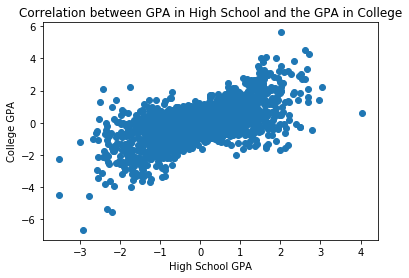

In [6]:



fix,ax = plt.subplots()
plt.scatter(x=data.high_school_GPA,y=data.college_GPA)
ax.set_xlabel('High School GPA')
ax.set_ylabel('College GPA')
ax.set_title('Correlation between GPA in High School and the GPA in College')


We see that there seems to be a positive correlation between GPA in high school and GPA in college, this makes sense to me, as there would be alot of the same factors involved in the two. It is not strictly positive off course, as there are people improwing from high school to college and vice versa.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     high_school_GPA_other   R-squared (uncentered):                   0.000
Model:                               OLS   Adj. R-squared (uncentered):             -0.000
Method:                    Least Squares   F-statistic:                            0.05536
Date:                   Fri, 22 May 2020   Prob (F-statistic):                       0.814
Time:                           13:40:43   Log-Likelihood:                         -2884.4
No. Observations:                   2000   AIC:                                      5771.
Df Residuals:                       1999   BIC:                                      5776.
Df Model:                              1                                                  
Covariance Type:               nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
high_school_GPA    -0.0053      0.022     -0.235      0.814      -0.049       0.039
==============================================================================
Omnibus:                        0.233   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.290
Skew:                           0.015   Prob(JB):                        0.865
Kurtosis:                       2.949   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

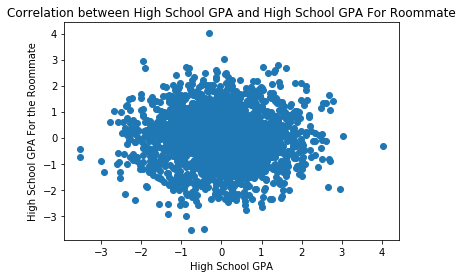

In [7]:

fix,ax = plt.subplots()
X = data.high_school_GPA
Y = data.high_school_GPA_other
plt.scatter(x=X,y=Y)
ax.set_xlabel('High School GPA')
ax.set_ylabel('High School GPA For the Roommate')
ax.set_title('Correlation between High School GPA and High School GPA For Roommate')

## Run OLS regression
model   = sm.OLS(Y,X)
results = model.fit()
results.summary()

In the scatter plot for the correlation between the GPA of one person, and his roommate looks quite random. We see that most of the correlations are around 0, and that for both positive and negative correlations there are about equal differences, because even when allocated randomly then peple of the same type of GPA can be put together as roommates. This is also seen in the regression above, where you see that the coefficient of the result is not statistically significant, so it cant be ruled out that the correlation is different from zero.
This gives credit to the idea that the assignment of roommates are done independently on GPA scores from high school

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.403
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                              673.0
Date:                Fri, 22 May 2020   Prob (F-statistic):                   3.58e-224
Time:                        13:40:44   Log-Likelihood:                         -2586.7
No. Observations:                2000   AIC:                                      5177.
Df Residuals:                    1998   BIC:                                      5189.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA           0.7065      0.019     36.649      0.000       0.669       0.744
high_school_GPA_other     0.0362      0.019      1.880      0.060      -0.002       0.074
==============================================================================
Omnibus:                       77.511   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.691
Skew:                          -0.117   Prob(JB):                     6.53e-47
Kurtosis:                       4.580   Cond. No.                         1.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

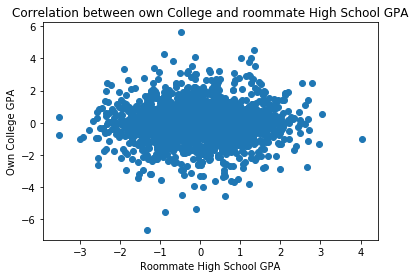

In [8]:
fix,ax = plt.subplots()
Y = data.college_GPA
X = data.high_school_GPA_other

plt.scatter(x=X,y=Y)
ax.set_ylabel('Own College GPA')
ax.set_xlabel('Roommate High School GPA')
ax.set_title('Correlation between own College and roommate High School GPA')

## Run OLS regression
Y_reg   = data['college_GPA']
X_reg   = data[['high_school_GPA','high_school_GPA_other']]
model   = sm.OLS(Y_reg,X_reg)
results = model.fit()
results.summary()

This regression shows that a persons own college GPA is highly dependent on ones high school GPA, this makes quite good sense, as you would expect both to be a measurement of peoples work ethic and ability, so should be correlated.
It also shows a weak positive correlation to your roommates high school GPA, so if it was worse than yours, then it will lower your college GPA and vice versa. This also makes somewhat sense since their college GPA will be affected by their high school GPA, so a college roommate with a high GPA from highscool will probably also get a high GPA in college, and this reflects a bit onto the roommate apparently.
It is just borderline insignificant.

In [9]:
## Run OLS regression
Y_reg   = data['college_GPA']
X_reg   = data[['high_school_GPA','high_school_GPA_other','college_GPA_other']]
model   = sm.OLS(Y_reg,X_reg)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            college_GPA   R-squared (uncentered):                   0.406
Model:                            OLS   Adj. R-squared (uncentered):              0.405
Method:                 Least Squares   F-statistic:                              454.9
Date:                Fri, 22 May 2020   Prob (F-statistic):                   3.23e-225
Time:                        13:40:44   Log-Likelihood:                         -2580.9
No. Observations:                2000   AIC:                                      5168.
Df Residuals:                    1997   BIC:                                      5185.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
high_school_GPA           0.7038      0.019     36.571      0.000       0.666       0.741
high_school_GPA_other    -0.0175      0.025     -0.703      0.482      -0.066       0.031
college_GPA_other         0.0760      0.022      3.407      0.001       0.032       0.120
==============================================================================
Omnibus:                       79.391   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              221.549
Skew:                          -0.117   Prob(JB):                     7.79e-49
Kurtosis:                       4.614   Cond. No.                         2.13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The third and final regression deals with endogenous effects. In this regression i still find that a persons own high school GPA is the biggest correlation to ones College GPA, and this result is very statistically significant.
I also find that your roommates college GPA has a positive correlation with your own college GPA, and this is statistically significant.

Your roommates high school GPA however is non significant, and also of a very low magnitude anyway.
This shows that it wasnt how well your roommate did in high school that translated into your performance in college, it was how well your roommate did in college that mattered.

This shows that there was some problems in the second regression as the roommates high school GPA was given some influence it didnt actually have, so there was an endogenous effect to care about.

This makes sense when you think about it, if someone did well in highschool but changes completely with their new college life, and their grades go down, then the actions that gets reflected onto you are probably of a negative character, for your grades that is.


Ex. 12.2.1: Explain the identification strategy in words.

The authors of the KRAKA report tries to use the variation between classes/years to study the effect of differing backgrounds. They dont use difference between different schools, but instead tries to use the difference of the same school from year to year as they hope the composition of the same school would stay reasonably the same. They dont differ between specific classes in a school as there are many personal reasons to why pupils gets put into certain classes(prior friendships etc)


Ex. 12.2.2: Are there any shortcomings of the identification strategy? What does the seminal paper Hoxby (2000) test for?

I think there are several shortcomings of the identification strategy, there are many reasons that could distort the estimates. The premiss is that by doing the exercise on a yearly basis within the same then you only get differences in the children. But many other things could have changed, the syllabus, the teacher qualification, any improvements made to increase learning or many similar things. It could also be that parents with higher standards will relocate away from schools that does poorer, and this then becomes a spiral, where more and more ressource strong parents will move away and therefore the school will perform poorer.

Hoxby tries to control for both gender and racial composition of each cohort/class, and this is important as she finds that a higher ratio of girls in a class will improve everyones performance in said class. So this is also problematic in the other paper, as they do not control for gender, as far as i am aware.

Ex. 12.2.3: Try to come up with identification strategies for identifying peer effects in the context of Danish class rooms.

To try and see how the peer effect is in danish school district you could try to redo the school districts, such that schools would get an entirely new set of neighbourhoods in their school district. This would make a natural experiment where you would be able to look at the difference before and after the redone school district. A problem with this method could be that people would know what would happen and would move in anticipation of the new districts.

Another idea would be to post siblings from different families into the same cohort, such that you get multiple data points for a single familiy in a setting where there might be some of the same parents in two different classes. It would be very hard to perform, and would also come with alot of problems, maybe there would even be some spill over from the experience the parents allready had from prior children. So while not very plausible to do, it would be exciting too see.
